In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
def wavepacket(x, x0, sigma0, kx, y=0, y0=0, ky=0):
    return np.exp(-0.5 * ((x - x0) ** 2 + (y - y0) ** 2) / sigma0 ** 2) * np.exp(1j * (kx * x + ky * y))

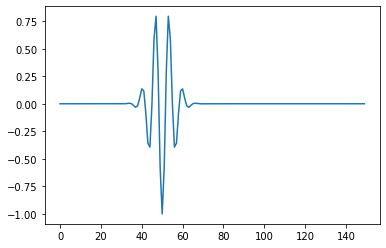

In [54]:
dx = 0.1
X = 15
x = np.arange(0, X, dx)

x0 = 5
kx = 3 * np.pi
sigma0 = 0.5

psi = wavepacket(x, x0, sigma0, kx)
plt.plot(np.real(psi))

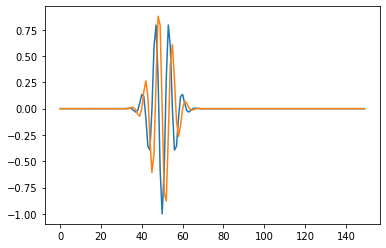

In [55]:
R = np.real(psi)
I = np.imag(psi)

plt.plot(R)
plt.plot(I)

In [43]:
dx = 0.1
X = 15
x = np.arange(0, X, dx)

x0 = 5
kx = 3 * np.pi
sigma0 = 0.5

psi = wavepacket(x, x0, sigma0, kx)
R = np.real(psi)
I = np.imag(psi)

R0 = R.copy()
I0 = I.copy()
R1 = R.copy()
I1 = I.copy()

V = np.zeros_like(R)

# Quantum Tunneling
V[120:130] = 200

dt = (dx / 4) ** 2
T = 2

i = slice(1, -1, 1)
i_l = slice(0, -2, 1)
i_r = slice(2, None, 1)

rho = []

for n in range(int(T / dt)):
    
    if n % int(T / (100 * dt)) == 0:
        rho.append((R1 ** 2 + I1 * I0).copy())
    
    R0[0] = I0[0] = R0[-1] = I0[-1] = 0
    
    R1[i] = R0[i] - dt * (I0[i_r] + I0[i_l] - 2 * (I0[i])) / (dx ** 2) + dt * V[i] * I0[i]
    I1[i] = I0[i] + dt * (R1[i_r] + R1[i_l] - 2 * (R1[i])) / (dx ** 2) - dt * V[i] * R1[i]
    
    R0 = R1.copy()
    I0 = I1.copy()

rho.append((R1 ** 2 + I1 * I0).copy())
rho = np.asarray(rho)

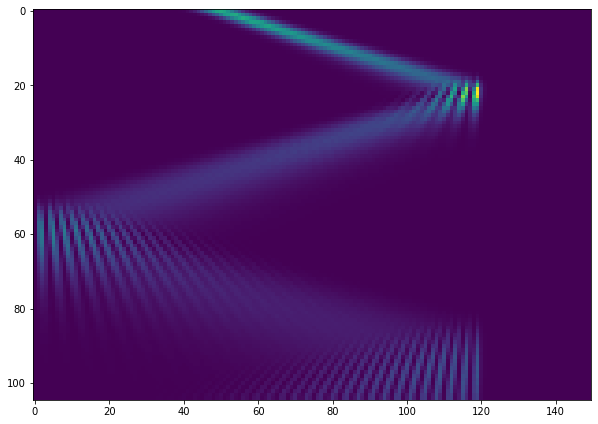

In [44]:
plt.figure(figsize=(10, 10))
plt.imshow(rho)

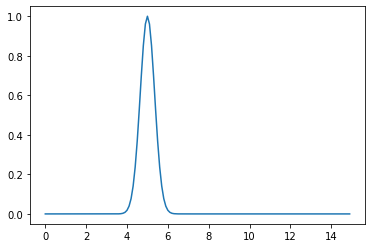

In [46]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

fig = plt.figure()

line, = plt.plot(x, rho[0])

def update(i):
    print(i, end='\r')
    line.set_data(x, rho[i])
    
ani = animation.FuncAnimation(fig, update, frames=rho.shape[0], interval=1000 / 30)
ani

In [50]:
dx = 0.1
X = 15
x = np.arange(0, X, dx)

x0 = 5
kx = 3 * np.pi
sigma0 = 0.5

psi = wavepacket(x, x0, sigma0, kx)

psi0 = psi.copy()
psi1 = psi.copy()
psi2 = psi.copy()
psi0[0] = psi0[-1] = 0

V = np.zeros_like(x)

# Quantum Tunneling
# V[100:103] = 200

dt = (dx / 2) ** 2
T = 2

i = slice(1, -1, 1)
i_l = slice(0, -2, 1)
i_r = slice(2, None, 1)

rho = []

for n in range(int(T / dt)):
    
    if n % int(T / (100 * dt)) == 0:
        rho.append(np.abs(psi0) ** 2)
    
    psi0[0] = psi0[-1] = 0
    psi2[i] = psi0[i] - 2j * dt * (V[i] * psi1[i] - (psi1[i_r] + psi1[i_l] - 2 * psi1[i]) / (dx ** 2))
    psi0 = psi1.copy()
    psi1 = psi2.copy()

rho.append(np.abs(psi0) ** 2)
rho = np.asarray(rho)

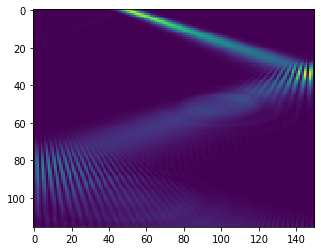

In [51]:
plt.imshow(rho)

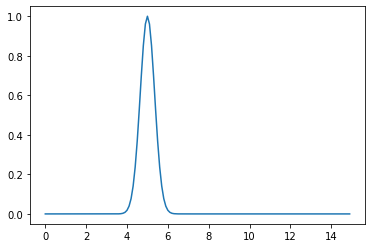

In [52]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

fig = plt.figure()

line, = plt.plot(x, rho[0])

def update(i):
    print(i, end='\r')
    line.set_data(x, rho[i])
    
ani = animation.FuncAnimation(fig, update, frames=rho.shape[0], interval=1000 / 30)
ani

In [85]:
dx = 0.05
X = 15
x = np.arange(0, X, dx)

dy = 0.1
Y = 15
y = np.arange(0, Y, dx)

xv, yv = np.meshgrid(x, y)

x0 = 5
y0 = 5

kx = -6 * np.pi
ky = 6 * np.pi
sigma0 = 0.5

psi = wavepacket(xv, x0, sigma0, kx, yv, y0, ky)

psi0 = psi.copy()
psi1 = psi.copy()
psi2 = psi.copy()
psi0[0, :] = 0
psi0[-1, :] = 0 
psi0[:, 0] = 0
psi0[:, -1] = 0

V = np.zeros_like(xv)

V = 10 * ((xv - X / 2) ** 2 + (yv - Y / 2) ** 2) 

# Quantum Tunneling
# V[100:103] = 200

dt = (dx / 4) ** 2
T = 2

i = slice(1, -1, 1)
i_l = slice(0, -2, 1)
i_r = slice(2, None, 1)

j = slice(1, -1, 1)
j_l = slice(0, -2, 1)
j_r = slice(2, None, 1)

rho = []

for n in range(int(T / dt)):
    
    if n % int(T / (100 * dt)) == 0:
        rho.append(np.abs(psi0) ** 2)
    
    psi2[i, j] = psi0[i, j] - 2j * dt * (V[i, j] * psi1[i, j] - (psi1[i_r, j] + psi1[i_l, j] - 4 * psi1[i, j] + psi1[i, j_r] + psi1[i, j_l]) / (dx ** 2))
    psi0 = psi1.copy()
    psi1 = psi2.copy()


rho.append(np.abs(psi0) ** 2)
rho = np.asarray(rho)

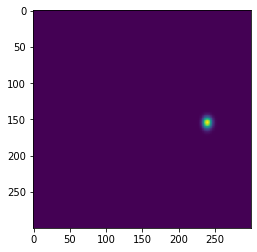

In [86]:
plt.imshow(np.abs(rho[30]) ** 2)

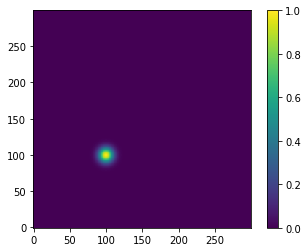

In [87]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
from matplotlib.colors import LogNorm, Normalize

fig = plt.figure()
img = plt.imshow(rho[0].transpose(), origin='lower')
plt.colorbar()

def update(i):
    print(i, end='\r')
    img.set_array(rho[i].transpose())
    img.set_norm(Normalize(vmin = np.min(rho[i]), vmax = np.max(rho[i])))
    
ani = animation.FuncAnimation(fig, update, frames=rho.shape[0], interval=1000 / 30)
ani